In [23]:
import pandas as pd
import numpy as np

import re

In [19]:
df=pd.read_csv("Output/Sharks_attacks_clean.csv")

In [20]:
df

,date,year,type,country,activity,sex,age,injury,fatal,time
0,Jun,2018,Unprovoked,USA,Others,F,57,"No injury to occupant, outrigger canoe and pad...",No Fatal,Evening
1,Jun,2018,Unprovoked,USA,Others,F,11,Minor injury to left thigh,No Fatal,Afternoon
2,Jun,2018,Unprovoked,USA,Surfing,M,48,Injury to left lower leg from surfboard skeg,No Fatal,Morning
3,Jun,2018,Unprovoked,BRAZIL,Swimming,M,18,FATAL,Fatal,Afternoon
4,Apr,2018,Unprovoked,COSTA RICA,Others,M,30,"No injury, shark bit scuba gear",No Fatal,Morning
...,...,...,...,...,...,...,...,...,...,...
2487,Jan,1863,Unprovoked,AUSTRALIA,Others,M,17,FATAL,Fatal,Evening
2488,Dec,1862,Unprovoked,NEW ZEALAND,Swimming,M,28,Right thigh and left foot severely bitten,No Fatal,Evening
2489,Jul,1862,Unprovoked,SPAIN,Swimming,M,0,FATAL,Fatal,Evening
2490,Feb,1852,Unprovoked,SOUTH AFRICA,NaN,M,0,FATAL. All of the women & children on board su...,Fatal,Evening


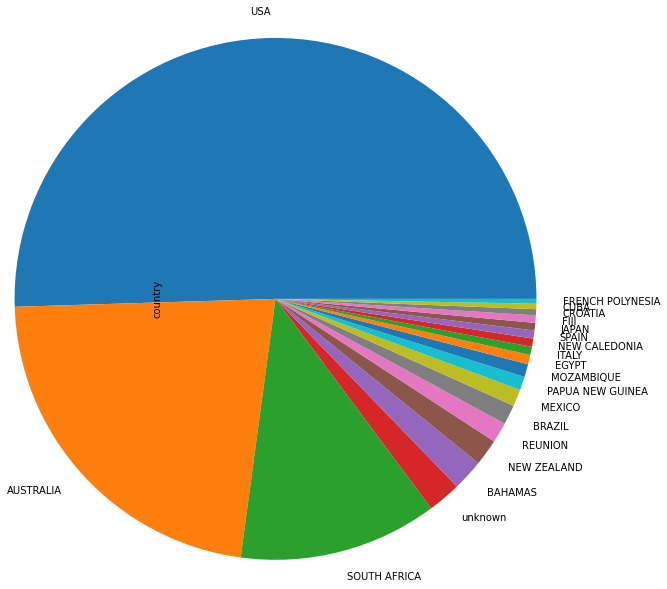

In [13]:
%matplotlib inline

df.country.value_counts()[:20].plot.pie(radius=3)

In [26]:
%matplotlib inline
plt.bar(df.country.value_counts(),df.type)

NameError: name 'plt' is not defined

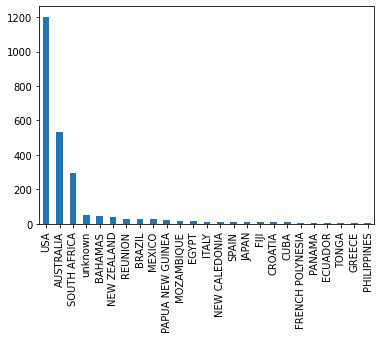

In [17]:
df.country.value_counts()[:25].plot.bar()

In [63]:
lol=df[["type","country"]]

In [72]:
lol.type=pd.qcut(lol.type,2)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [91]:
lol

,type,country
0,Unprovoked,USA
1,Unprovoked,USA
2,Unprovoked,USA
3,Unprovoked,BRAZIL
4,Unprovoked,COSTA RICA
...,...,...
2487,Unprovoked,AUSTRALIA
2488,Unprovoked,NEW ZEALAND
2489,Unprovoked,SPAIN
2490,Unprovoked,SOUTH AFRICA


In [92]:
lol["nuevo"]=lol.type.apply(lambda x: 1 if x=="Unprovoked" else 0)

<ipython-input-92-8a8816fb7c39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lol["nuevo"]=lol.type.apply(lambda x: 1 if x=="Unprovoked" else 0)


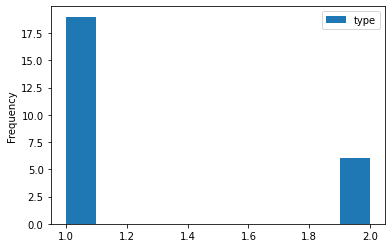

In [139]:
df.groupby(["activity","type","year"]).agg({"type":"count"})[:25].plot.hist()

In [113]:
df

,date,year,type,country,activity,sex,age,injury,fatal,time
0,Jun,2018,Unprovoked,USA,Others,F,57,"No injury to occupant, outrigger canoe and pad...",No Fatal,Evening
1,Jun,2018,Unprovoked,USA,Others,F,11,Minor injury to left thigh,No Fatal,Afternoon
2,Jun,2018,Unprovoked,USA,Surfing,M,48,Injury to left lower leg from surfboard skeg,No Fatal,Morning
3,Jun,2018,Unprovoked,BRAZIL,Swimming,M,18,FATAL,Fatal,Afternoon
4,Apr,2018,Unprovoked,COSTA RICA,Others,M,30,"No injury, shark bit scuba gear",No Fatal,Morning
...,...,...,...,...,...,...,...,...,...,...
2487,Jan,1863,Unprovoked,AUSTRALIA,Others,M,17,FATAL,Fatal,Evening
2488,Dec,1862,Unprovoked,NEW ZEALAND,Swimming,M,28,Right thigh and left foot severely bitten,No Fatal,Evening
2489,Jul,1862,Unprovoked,SPAIN,Swimming,M,0,FATAL,Fatal,Evening
2490,Feb,1852,Unprovoked,SOUTH AFRICA,NaN,M,0,FATAL. All of the women & children on board su...,Fatal,Evening
